# Importing Modules

In [2]:
import numpy as np 
import pandas as pd

In [3]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

import random 
import matplotlib.image as mpimg
import cv2
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2

warnings.filterwarnings('ignore')

# loading Data and EDA

In [4]:
path='labels.csv'
df=pd.read_csv(path)
df.head()

name  category  type  grade
0  1.jpg         0     4      3
1  2.jpg         0     4      3
2  3.jpg         0     2      2
3  4.jpg         0     2      1
4  5.jpg         0     1      3

In [7]:
import os

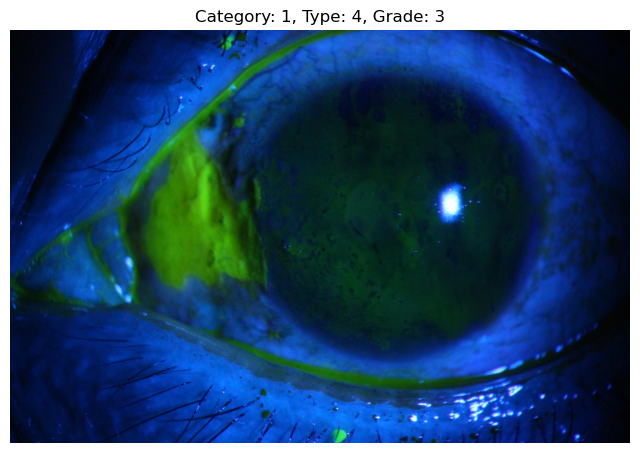

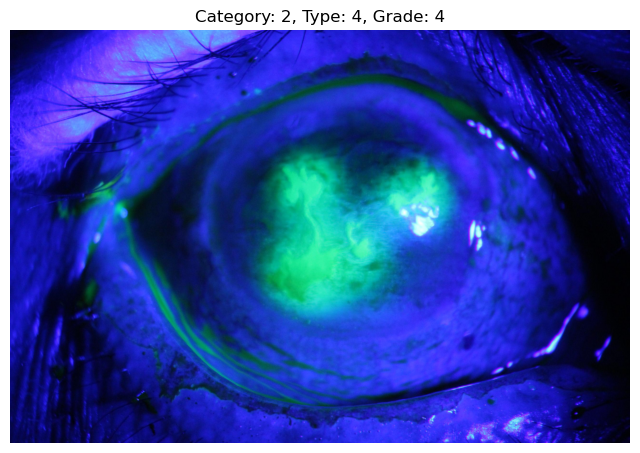

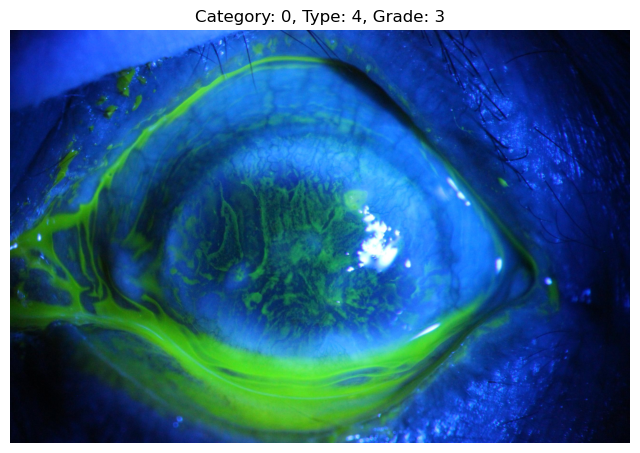

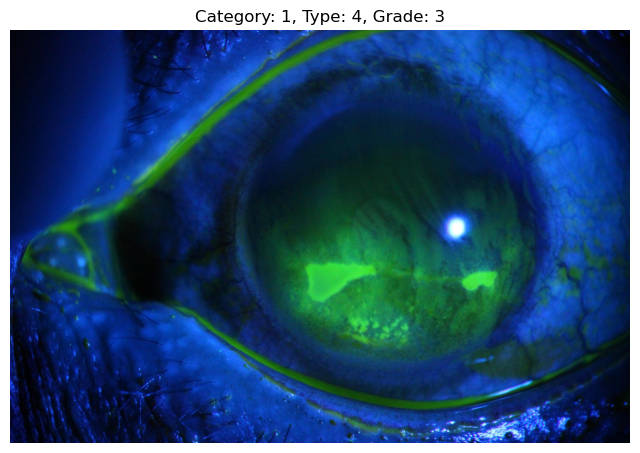

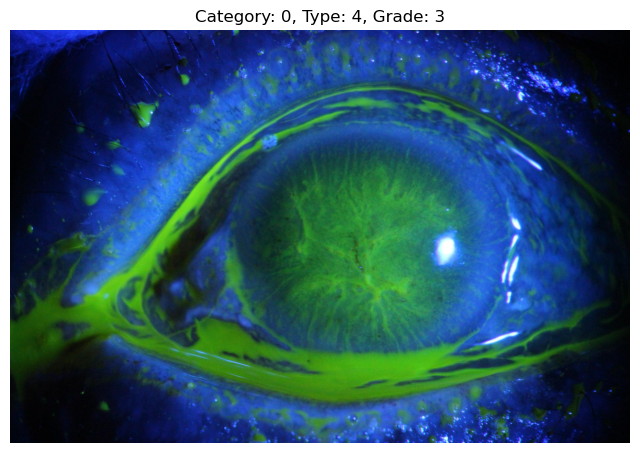

In [8]:
image_dir = "images"

# Load dataset
csv_file_path = "labels.csv"
dataset = pd.read_csv(csv_file_path)

# Select five random images
random_image_indices = random.sample(range(len(dataset)), 5)

# Display the selected images with labels
for idx in random_image_indices:
    image_path = os.path.join(image_dir, dataset.loc[idx, 'name'])
    image = mpimg.imread(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Category: {dataset.loc[idx, 'category']}, Type: {dataset.loc[idx, 'type']}, Grade: {dataset.loc[idx, 'grade']}")
    plt.axis('off')
    plt.show()

In [10]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2], dtype=int64)

In [11]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3], dtype=int64)

In [12]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4], dtype=int64)

In [13]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 548, 2: 40, 1: 78, 0: 36, 3: 10}
{0: 358, 1: 263, 2: 91}
{3: 273, 2: 203, 1: 98, 0: 36, 4: 102}


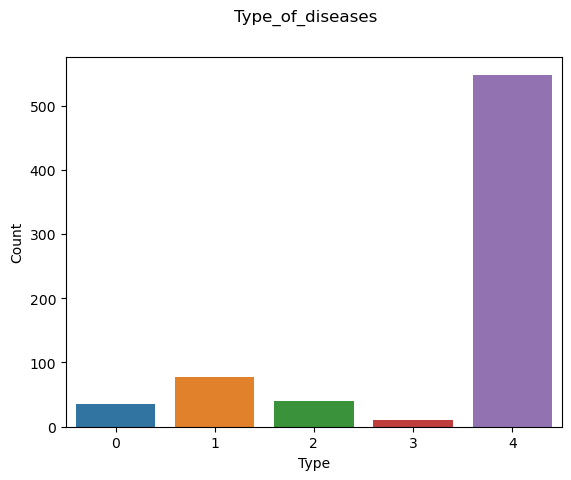

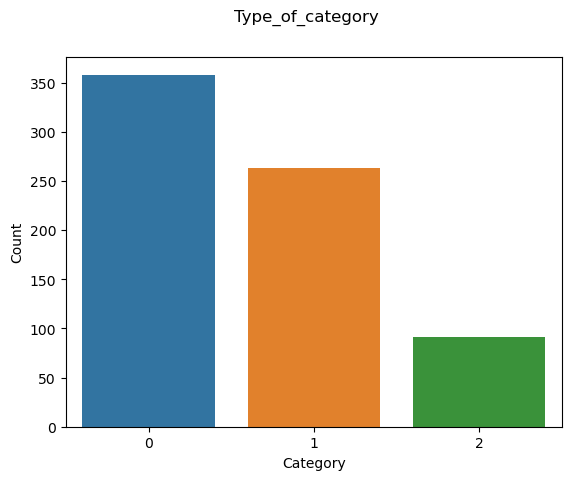

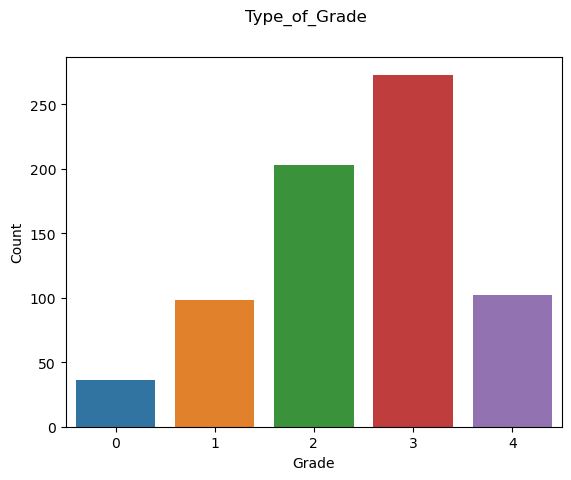

In [14]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Data Augmentation

In [15]:
def augment_image(image_path):
    image = cv2.imread(image_path)
    # Apply augmentation techniques here
    # For example, you can add rotation, flipping, scaling, etc.
    augmented_images = [image]  # Initial image
    # Example: Rotate the image
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    augmented_images.append(rotated_image)
    return augmented_images

# Define paths
input_folder = "images"  # Folder containing original images
output_folder = "augmented_images"  # Folder to store augmented images

# Create output folder if not exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Augment images and append to the dataset
augmented_dataset = []
for index, row in dataset.iterrows():
    image_name = row['name']
    image_path = os.path.join(input_folder, image_name)
    augmented_images = augment_image(image_path)
    for augmented_image in augmented_images:
        augmented_image_name = f"{os.path.splitext(image_name)[0]}_augmented.jpg"
        augmented_image_path = os.path.join(output_folder, augmented_image_name)
        cv2.imwrite(augmented_image_path, augmented_image)
        augmented_row = {
            'name': augmented_image_name,
            'category': row['category'],
            'type': row['type'],
            'grade': row['grade']
        }
        augmented_dataset.append(augmented_row)

# Convert augmented dataset to DataFrame
augmented_dataset_df = pd.DataFrame(augmented_dataset)

# Append augmented dataset to original dataset
combined_dataset = pd.concat([dataset, augmented_dataset_df], ignore_index=True)

# Save combined dataset to CSV
combined_dataset.to_csv("combined_dataset.csv", index=False)

In [16]:
source_images_folder = "images"
destination_images_folder = "augmented_images"

# Copy images
if os.path.exists(source_images_folder) and os.path.isdir(source_images_folder):
    if not os.path.exists(destination_images_folder):
        os.makedirs(destination_images_folder)
    # Copy contents of source_images_folder to destination_images_folder
    for file_name in os.listdir(source_images_folder):
        source_file = os.path.join(source_images_folder, file_name)
        destination_file = os.path.join(destination_images_folder, file_name)
        shutil.copyfile(source_file, destination_file)
else:
    print("Source images folder not found.")

In [17]:
df=combined_dataset
df

name  category  type  grade
0                 1.jpg         0     4      3
1                 2.jpg         0     4      3
2                 3.jpg         0     2      2
3                 4.jpg         0     2      1
4                 5.jpg         0     1      3
...                 ...       ...   ...    ...
2131  710_augmented.jpg         2     1      4
2132  711_augmented.jpg         2     3      4
2133  711_augmented.jpg         2     3      4
2134  712_augmented.jpg         2     4      4
2135  712_augmented.jpg         2     4      4

[2136 rows x 4 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [19]:
train_image='augmented_images'
train_image

'augmented_images'

In [20]:
df.nunique()

name        1424
category       3
type           5
grade          5
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [22]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2], dtype=int64)

In [23]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3], dtype=int64)

In [24]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4], dtype=int64)

In [25]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 1644, 2: 120, 1: 234, 0: 108, 3: 30}
{0: 1074, 1: 789, 2: 273}
{3: 819, 2: 609, 1: 294, 0: 108, 4: 306}


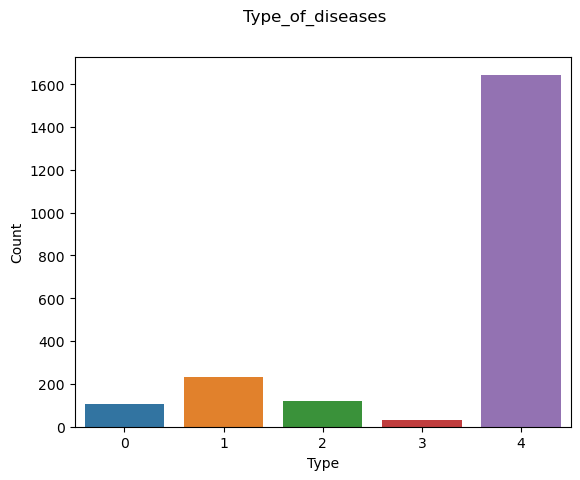

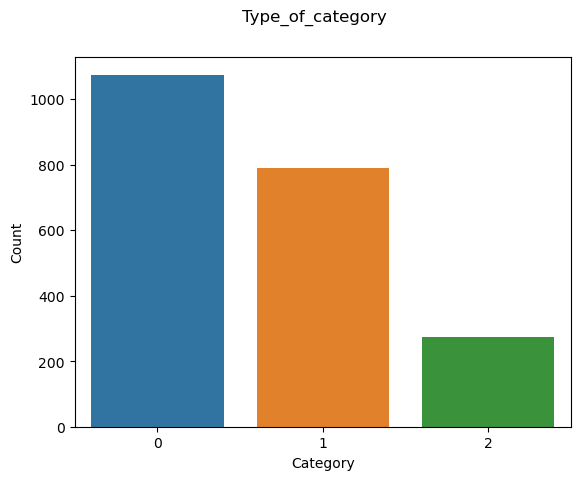

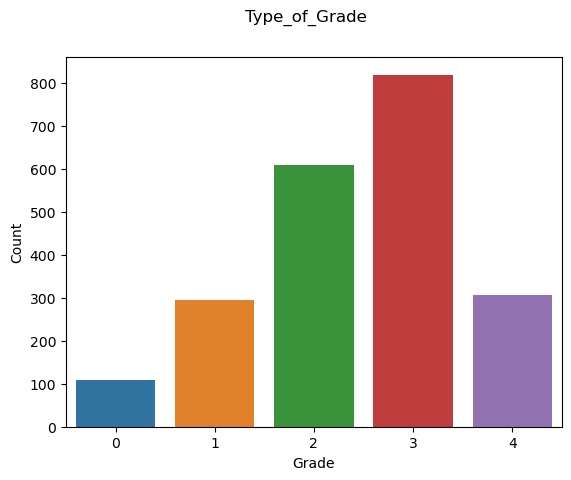

In [26]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Model Building

In [27]:
from tensorflow.keras.preprocessing import image

train_images = []

for i in tqdm(range(df.shape[0])):
    img = image.load_img('augmented_images/'+df['name'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    img = img/255
#     train_images.append(img)
    train_images.append(img)

X = np.array(train_images)
X[0:10]

100%|██████████| 2136/2136 [01:57<00:00, 18.15it/s]


array([[[[0.00784314, 0.01568628, 0.0627451 ],
         [0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.00784314, 0.02352941, 0.05882353],
         [0.00392157, 0.01960784, 0.0627451 ],
         [0.00392157, 0.01960784, 0.0627451 ]],

        [[0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.01960784, 0.02745098, 0.11764706],
         [0.00784314, 0.02352941, 0.07058824],
         [0.00784314, 0.02352941, 0.06666667]],

        [[0.01568628, 0.01568628, 0.0627451 ],
         [0.01960784, 0.02745098, 0.07843138],
         [0.01960784, 0.02745098, 0.07843138],
         ...,
         [0.01568628, 0.02745098, 0.16470589],
         [0.00392157, 0.02352941, 0.09803922],
         [0.00784314, 0.02352941, 0.06666667]],

        ...,

        [[0.00784314, 0.02745098, 0.05098039],
         [0.01176471, 0.02745098, 0.0627451 ]

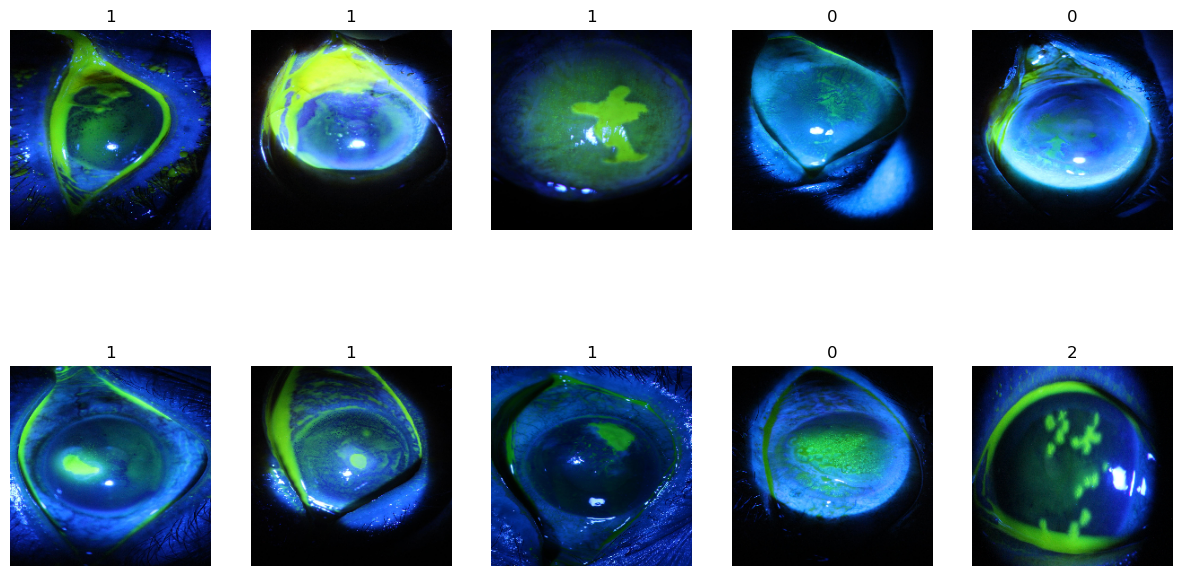

In [28]:
sample_indices = random.sample(range(len(train_images)), 10)

# Display the images with their corresponding labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[idx])
    plt.title(df['category'][idx])  # Accessing label directly from DataFrame
    plt.axis('off')
plt.show()


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, df['category'].values, test_size=0.3, random_state=42)

In [30]:
input_layer = Input(shape=(224, 224, 3))

In [31]:
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


# Flatten layer
flatten = Flatten()(pool2)

# Fully connected layers with L2 regularization
dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten)
dropout1 = Dropout(0.7)(dense1)
dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.5)(dense2)

# Output layer
output_layer = Dense(len(df['category'].unique()), activation='softmax')(dropout2)

In [32]:
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,703,491 (365.08 MB)

 Trainable params: 95,703,491 (365.08 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history=model.fit(X_train, y_train, epochs=10,batch_size=32,
                  validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4465 - loss: 12.0912 - val_accuracy: 0.6739 - val_loss: 3.8558
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6157 - loss: 3.4400 - val_accuracy: 0.6708 - val_loss: 2.6288
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6348 - loss: 2.5780 - val_accuracy: 0.6724 - val_loss: 2.2535
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6587 - loss: 2.2341 - val_accuracy: 0.6771 - val_loss: 2.0800
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6650 - loss: 2.0718 - val_accuracy: 0.6630 - val_loss: 1.9820
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6845 - loss: 1.8870 - val_accuracy: 0.6973 - val_loss: 1.7713
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6958 - loss: 1.7412 - val_accuracy: 0.6880 - val_loss: 1.6879
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6971 - loss: 1.6188 - val_accuracy: 0.7020 - val_loss

In [36]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7538461685180664
Test Accuracy: 0.7269890904426575


In [37]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

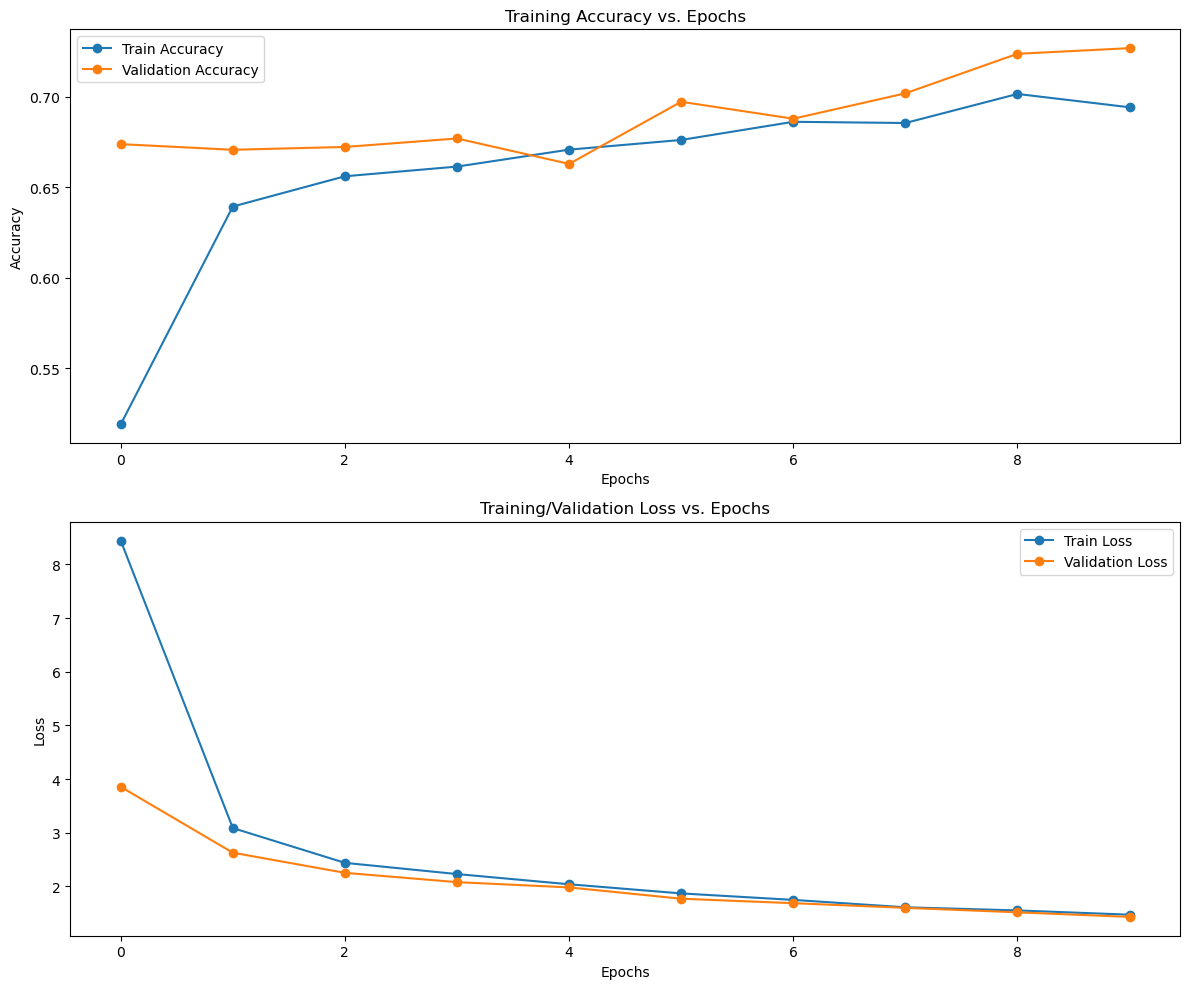

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [39]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2,

In [40]:
y_pred=model.predict(X_test) 
y_pred

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step


array([[0.17363548, 0.5864144 , 0.23995015],
       [0.65127116, 0.25184423, 0.09688458],
       [0.14125688, 0.5398308 , 0.31891233],
       ...,
       [0.6841717 , 0.23315458, 0.08267375],
       [0.6368947 , 0.28651264, 0.07659261],
       [0.83913463, 0.12613824, 0.03472711]], dtype=float32)

In [41]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [42]:
y_pred_train=model.predict(X_train) 
y_pred_train

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step


array([[8.66193533e-01, 1.03937119e-01, 2.98693553e-02],
       [5.61866343e-01, 3.17696869e-01, 1.20436750e-01],
       [4.97911533e-04, 3.56704801e-01, 6.42797291e-01],
       ...,
       [8.60937059e-01, 1.08263806e-01, 3.07992008e-02],
       [5.85296571e-01, 3.27801973e-01, 8.69014338e-02],
       [7.02050090e-01, 2.42764354e-01, 5.51855043e-02]], dtype=float32)

In [43]:
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_pred_classes_train

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [44]:
class_counts = np.bincount(y_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 764 instances
Class 1: 532 instances
Class 2: 199 instances


In [45]:
class_counts = np.bincount(y_pred_classes_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 889 instances
Class 1: 575 instances
Class 2: 31 instances


In [46]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.74      0.90      0.82       310
           1       0.69      0.70      0.70       257
           2       1.00      0.08      0.15        74

    accuracy                           0.73       641
   macro avg       0.81      0.56      0.55       641
weighted avg       0.75      0.73      0.69       641



In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, df['type'].values, test_size=0.3, random_state=42)

In [57]:
from tensorflow.keras.applications import VGG16

In [58]:
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model1 = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [59]:
history=model1.fit(X_train1, y_train1, epochs=9, batch_size=64, 
                   validation_data=(X_test1, y_test1),verbose=1)

Epoch 1/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.6258 - loss: 1.1540 - val_accuracy: 0.7832 - val_loss: 0.7863
Epoch 2/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 173s 7s/step - accuracy: 0.7639 - loss: 0.8453 - val_accuracy: 0.7832 - val_loss: 0.7753
Epoch 3/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 164s 7s/step - accuracy: 0.7695 - loss: 0.8329 - val_accuracy: 0.7832 - val_loss: 0.7620
Epoch 4/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.7506 - loss: 0.8378 - val_accuracy: 0.7832 - val_loss: 0.7627
Epoch 5/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 165s 7s/step - accuracy: 0.7653 - loss: 0.8111 - val_accuracy: 0.7832 - val_loss: 0.7439
Epoch 6/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 162s 7s/step - accuracy: 0.7843 - loss: 0.7474 - val_accuracy: 0.7832 - val_loss: 0.7388
Epoch 7/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 182s 8s/step - accuracy: 0.7735 - loss: 0.7691 - val_accuracy: 0.7832 - val_loss: 0.7315
Epoch 8/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 201s 9s/step - accuracy: 0.7702 - loss: 0.7378 - val_accuracy: 0.7832 - val_loss:

In [60]:
train_loss1, train_accuracy1 = model1.evaluate(X_train1, y_train1, verbose=0)
print("Training Accuracy:", train_accuracy1)
test_loss1, test_accuracy1 = model1.evaluate(X_test1, y_test1, verbose=0)
print("Test Accuracy:", test_accuracy1)

Training Accuracy: 0.7658863067626953
Test Accuracy: 0.7831513285636902


In [61]:
train_accuracy1 = history.history['accuracy']
val_accuracy1 = history.history['val_accuracy']

train_loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

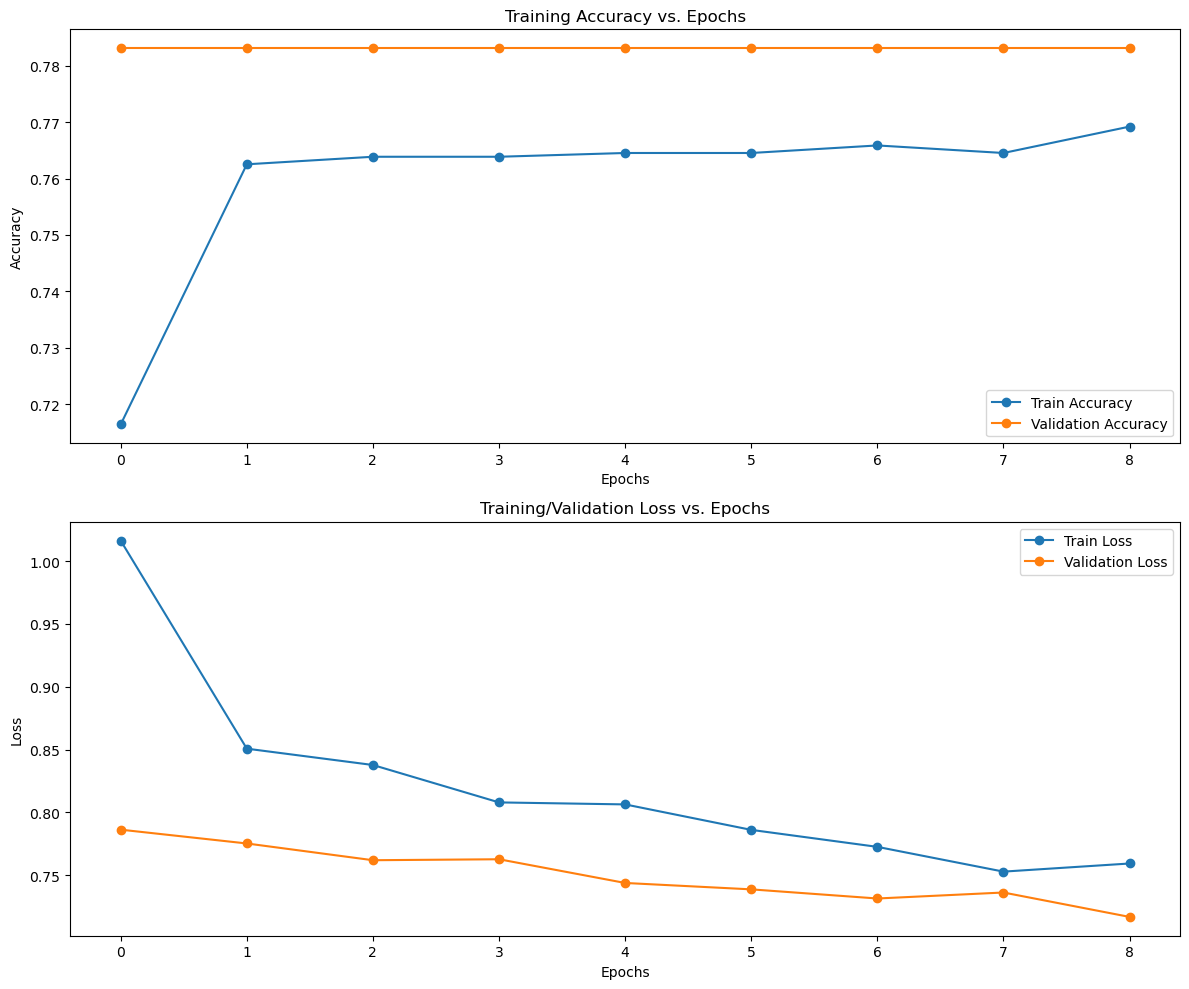

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy1, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy1, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss1, 'o-', label='Train Loss')
ax[1].plot(val_loss1, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()


In [63]:
y_test1

array([4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 3,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 3, 4, 4, 1, 4, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 2, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 2, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 3, 4, 2, 4, 3,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [64]:
y_pred1=model1.predict(X_test1) 
y_pred1

21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step


array([[0.02084943, 0.31030163, 0.07764213, 0.01781643, 0.57339036],
       [0.05239344, 0.12495522, 0.07825061, 0.01454662, 0.72985417],
       [0.01865839, 0.07732634, 0.03717729, 0.00661736, 0.8602207 ],
       ...,
       [0.03246089, 0.07956997, 0.05052243, 0.00979792, 0.8276489 ],
       [0.03730118, 0.12421045, 0.05549599, 0.01282235, 0.7701701 ],
       [0.13438714, 0.11305039, 0.07754685, 0.02535512, 0.6496605 ]],
      dtype=float32)

In [65]:
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_pred_classes1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [66]:
print(classification_report(y_test1,y_pred_classes1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         9
           4       0.78      1.00      0.88       502

    accuracy                           0.78       641
   macro avg       0.16      0.20      0.18       641
weighted avg       0.61      0.78      0.69       641



In [67]:
y_pred1_train=model1.predict(X_train1) 
y_pred1

47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step


array([[0.02084943, 0.31030163, 0.07764213, 0.01781643, 0.57339036],
       [0.05239344, 0.12495522, 0.07825061, 0.01454662, 0.72985417],
       [0.01865839, 0.07732634, 0.03717729, 0.00661736, 0.8602207 ],
       ...,
       [0.03246089, 0.07956997, 0.05052243, 0.00979792, 0.8276489 ],
       [0.03730118, 0.12421045, 0.05549599, 0.01282235, 0.7701701 ],
       [0.13438714, 0.11305039, 0.07754685, 0.02535512, 0.6496605 ]],
      dtype=float32)

In [68]:
y_pred_classes1_train = np.argmax(y_pred1_train, axis=1)
y_pred_classes1_train

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [69]:
class_counts = np.bincount(y_pred_classes1_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 0 instances
Class 1: 3 instances
Class 2: 0 instances
Class 3: 0 instances
Class 4: 1492 instances


In [70]:
y_train1

array([4, 4, 4, ..., 2, 4, 0], dtype=int64)

In [71]:
class_counts = np.bincount(y_train1)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 75 instances
Class 1: 173 instances
Class 2: 84 instances
Class 3: 21 instances
Class 4: 1142 instances


In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['grade'].values, 
                                                        test_size=0.3,
                                                        random_state=42)

In [73]:
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [74]:
history = model.fit(X_train2, y_train2, epochs=25,
                    batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3336 - loss: 1.5885 - val_accuracy: 0.3712 - val_loss: 1.4389
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3430 - loss: 1.4244 - val_accuracy: 0.3779 - val_loss: 1.3970
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.3703 - loss: 1.3776 - val_accuracy: 0.3712 - val_loss: 1.3888
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.4151 - loss: 1.3461 - val_accuracy: 0.3712 - val_loss: 1.4025
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 211s 6s/step - accuracy: 0.4056 - loss: 1.3724 - val_accuracy: 0.3980 - val_loss: 1.3662
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.3868 - loss: 1.3246 - val_accuracy: 0.4281 - val_loss: 1.3369
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 224s 6s/step - accuracy: 0.3784 - loss: 1.3473 - val_accuracy: 0.3946 - val_loss: 1.3275
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.4573 - loss: 1.2871 - val_accuracy: 0.4381 - val_

In [75]:
 train_loss2, train_accuracy2 = model.evaluate(X_train2, y_train2, verbose=0)
print("Training Accuracy:", train_accuracy2)
test_loss2, test_accuracy2 = model.evaluate(X_test2, y_test2, verbose=0)
print("Test Accuracy:", test_accuracy2)

Training Accuracy: 0.5177257657051086
Test Accuracy: 0.45553821325302124


In [76]:
train_accuracy2 = history.history['accuracy']
val_accuracy2 = history.history['val_accuracy']

train_loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

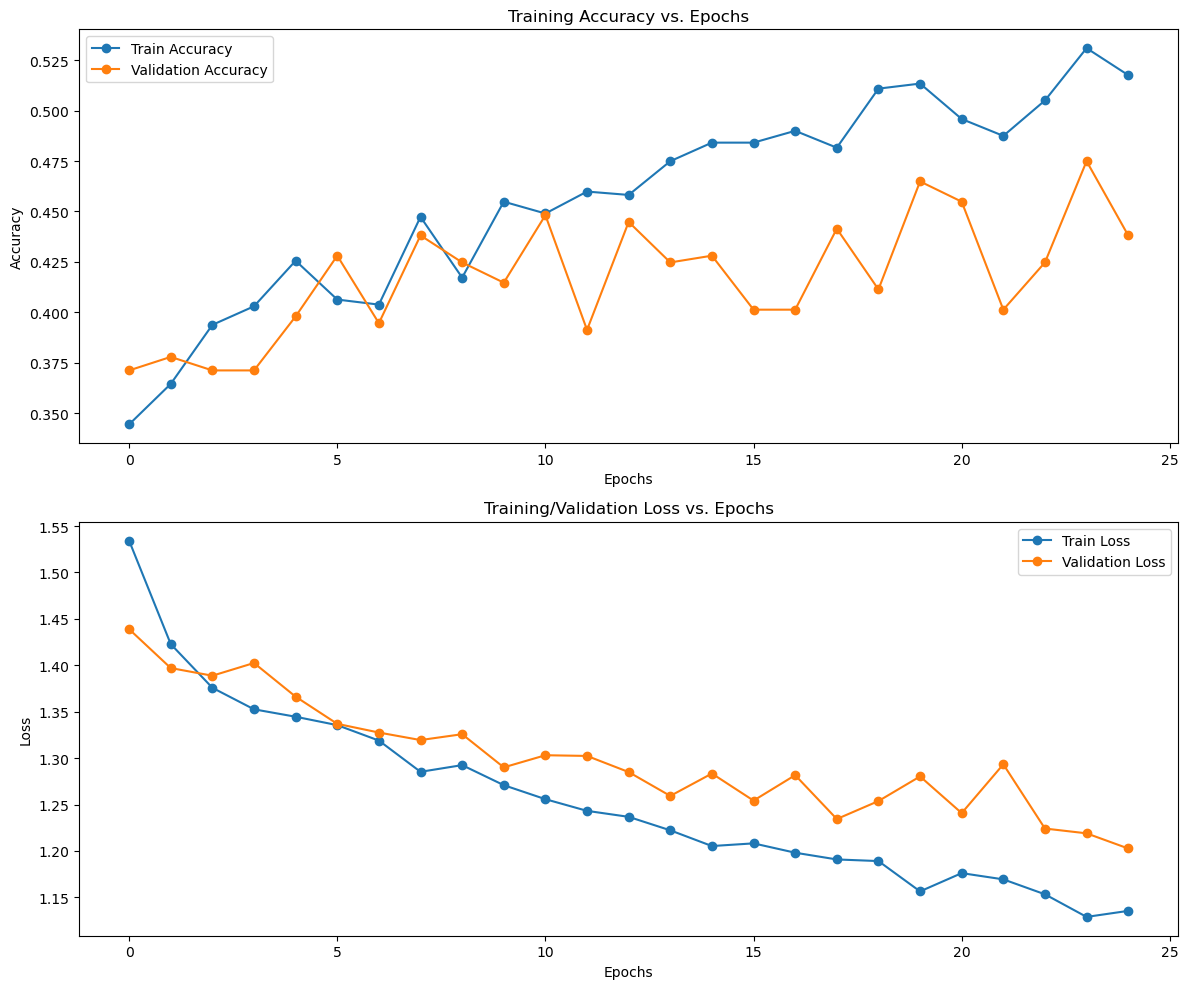

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy2, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy2, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss2, 'o-', label='Train Loss')
ax[1].plot(val_loss2, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [78]:
y_test2

array([3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 4, 1, 4, 2, 2, 3, 2, 3, 3, 3, 2, 3,
       3, 4, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 4, 1, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 3, 4, 3, 1, 3, 2, 2, 3, 2, 2, 2, 4, 4, 3, 1, 1, 3, 2, 3, 4,
       3, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 4, 3, 1, 2, 0, 2, 3, 3, 2, 4, 2,
       1, 3, 3, 2, 2, 3, 2, 3, 1, 1, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 1, 3,
       2, 3, 3, 3, 4, 1, 2, 3, 3, 3, 2, 1, 2, 4, 3, 3, 3, 3, 2, 4, 2, 3,
       3, 2, 2, 4, 4, 3, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 4, 1, 4, 3, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 1, 1, 1, 2, 1, 2, 4, 4,
       3, 3, 3, 4, 3, 4, 2, 2, 1, 1, 3, 3, 2, 3, 0, 2, 3, 3, 2, 1, 2, 3,
       2, 1, 3, 4, 3, 2, 4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3,
       3, 4, 3, 0, 1, 2, 0, 0, 2, 2, 3, 2, 3, 1, 4, 3, 2, 4, 3, 3, 3, 4,
       3, 3, 2, 3, 1, 2, 4, 0, 4, 2, 4, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 4,
       2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 4,
       2, 1, 3, 3, 4, 3, 4, 2, 1, 3, 1, 3, 3, 3, 4,

In [79]:
y_pred2=model.predict(X_test2) 
y_pred2

21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step


array([[0.01505027, 0.0456612 , 0.2169062 , 0.53896254, 0.18341973],
       [0.11525006, 0.38934916, 0.27877295, 0.18983829, 0.02678952],
       [0.02087916, 0.24692893, 0.32369712, 0.31229132, 0.09620348],
       ...,
       [0.0309205 , 0.15257116, 0.27002615, 0.49295914, 0.05352305],
       [0.03198331, 0.07694816, 0.21652856, 0.58250314, 0.09203679],
       [0.20817666, 0.23733495, 0.24123314, 0.27749375, 0.03576148]],
      dtype=float32)

In [80]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_pred_classes2

array([3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 4, 1, 4, 3, 1, 4, 3, 3, 2, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 2, 4, 2, 4, 2, 1, 3, 3, 4, 3, 3, 3, 4, 3, 2, 3, 1, 2,
       3, 2, 3, 4, 1, 3, 2, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 4, 3, 3, 4, 3, 4, 2, 4, 3, 3, 1, 2, 3, 1, 1, 2, 3, 1,
       3, 4, 3, 3, 4, 3, 2, 1, 1, 4, 3, 3, 2, 3, 3, 2, 4, 3, 3, 4, 3, 3,
       3, 2, 3, 3, 4, 1, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 1, 3, 3,
       3, 2, 3, 2, 4, 3, 1, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 4, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4,
       3, 3, 4, 2, 1, 3, 2, 3, 1, 2, 4, 3, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3,
       3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 3, 4,

In [81]:
print(classification_report(y_test2,y_pred_classes2))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        33
           1       0.42      0.28      0.34        89
           2       0.45      0.21      0.29       184
           3       0.48      0.79      0.60       245
           4       0.35      0.36      0.35        90

    accuracy                           0.46       641
   macro avg       0.54      0.34      0.34       641
weighted avg       0.47      0.46      0.41       641



In [82]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam


In [83]:
input_shape = (224, 224, 3)
num_classes = len(df['category'].unique())

# Base model - VGG16 without top layers, pretrained on ImageNet
base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
base_model.trainable = False  # Freeze VGG16 weights for transfer learning

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.3)(x)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,109,443 (57.64 MB)

 Trainable params: 394,755 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [85]:
history=model.fit(X_train, y_train, epochs=10,batch_size=32,
                  validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.4714 - loss: 7.3574 - val_accuracy: 0.4977 - val_loss: 3.0078
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.5707 - loss: 2.5451 - val_accuracy: 0.6521 - val_loss: 1.6684
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.6139 - loss: 1.6014 - val_accuracy: 0.6942 - val_loss: 1.3065
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.6512 - loss: 1.2886 - val_accuracy: 0.6615 - val_loss: 1.1893
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.6469 - loss: 1.1396 - val_accuracy: 0.7067 - val_loss: 1.0380
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.6421 - loss: 1.0719 - val_accuracy: 0.6552 - val_loss: 1.0425
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.6555 - loss: 1.0200 - val_accuracy: 0.6958 - val_loss: 0.9770
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 343s 7s/step - accuracy: 0.6751 - loss: 0.9692 - val_accuracy: 0.7114 - v

In [86]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.6702340841293335
Test Accuracy: 0.6879875063896179


In [87]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

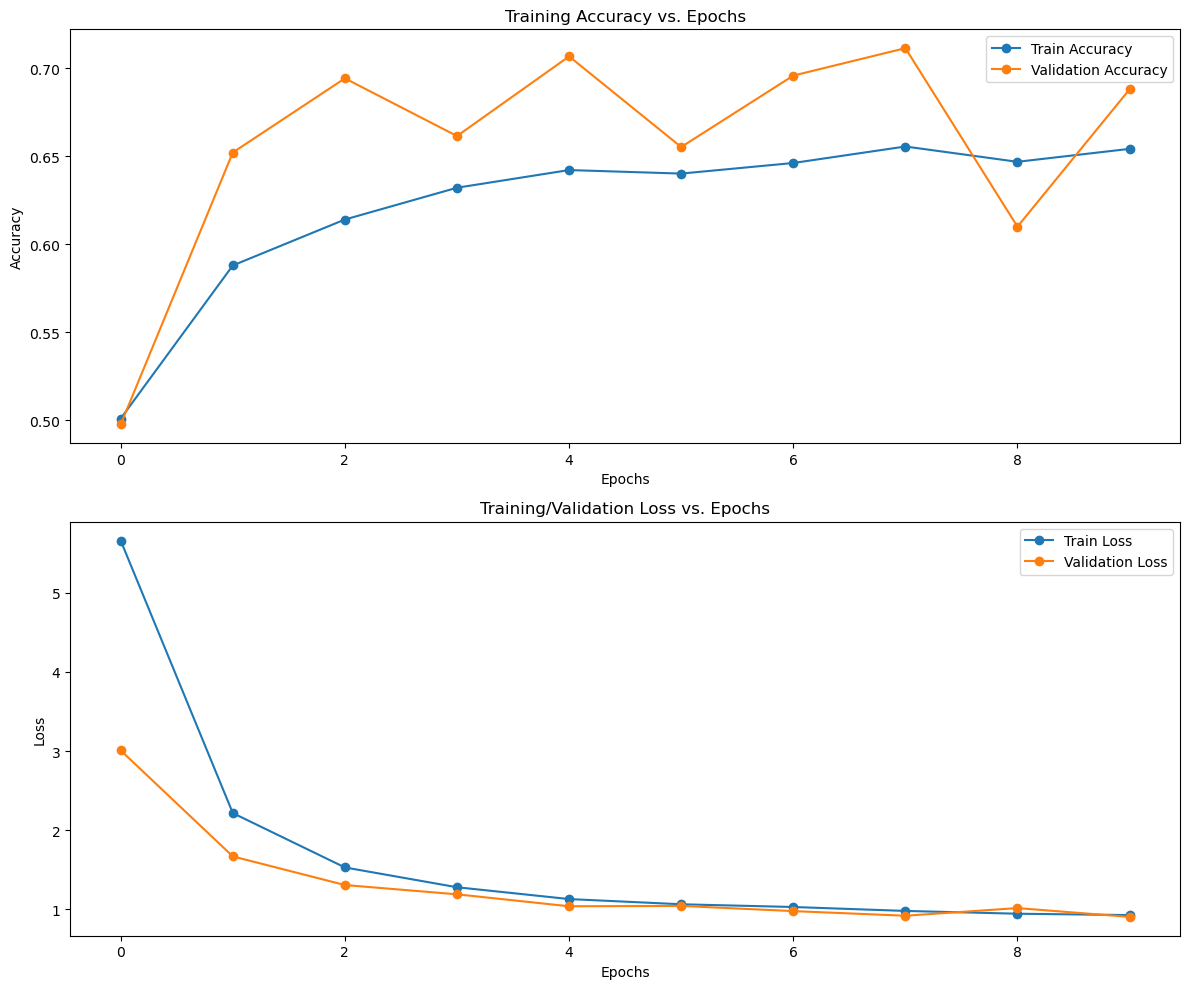

In [88]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [89]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2,

In [90]:
y_pred=model.predict(X_test) 
y_pred

21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


array([[0.2089426 , 0.5058018 , 0.2852556 ],
       [0.866423  , 0.102648  , 0.03092897],
       [0.3269905 , 0.44605783, 0.22695173],
       ...,
       [0.7650385 , 0.1722082 , 0.06275332],
       [0.62764543, 0.2613439 , 0.11101068],
       [0.8169264 , 0.1373408 , 0.04573281]], dtype=float32)

In [91]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
y_pred_train=model.predict(X_train) 
y_pred_train

47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step


array([[0.87707406, 0.09535748, 0.02756853],
       [0.44294873, 0.3796219 , 0.17742941],
       [0.29915616, 0.45832705, 0.24251674],
       ...,
       [0.818263  , 0.13600886, 0.04572814],
       [0.67812335, 0.23088405, 0.09099259],
       [0.83728826, 0.12328781, 0.03942388]], dtype=float32)

In [93]:
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_pred_classes_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [94]:
class_counts = np.bincount(y_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 764 instances
Class 1: 532 instances
Class 2: 199 instances


In [95]:
class_counts = np.bincount(y_pred_classes_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 1030 instances
Class 1: 465 instances


In [96]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       310
           1       0.74      0.58      0.65       257
           2       0.00      0.00      0.00        74

    accuracy                           0.69       641
   macro avg       0.47      0.51      0.48       641
weighted avg       0.62      0.69      0.64       641

